<ipython-input-1-cccbd634ca90>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  result += control_points[i] * np.math.comb(n, i) * ((1 - t) ** (n - i)) * (t ** i)


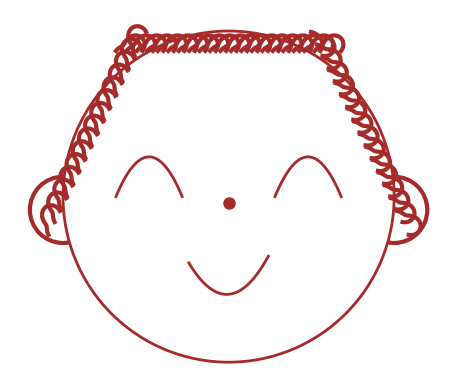

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 曲線の計算
def bezier_curve(t, control_points):
    n = len(control_points) - 1
    result = np.zeros(2)
    for i in range(n + 1):
        result += control_points[i] * np.math.comb(n, i) * ((1 - t) ** (n - i)) * (t ** i)
    return result

# 回転行列を使って点を回転させる関数
def rotate_point(x, y, angle, center=(0.5, 0.55)):
    x_new = (x - center[0]) * np.cos(angle) - (y - center[1]) * np.sin(angle) + center[0]
    y_new = (x - center[0]) * np.sin(angle) + (y - center[1]) * np.cos(angle) + center[1]
    return x_new, y_new

# 描画用の関数を定義
def draw_face():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()

    # 頭
    head = plt.Circle((0.5, 0.55), 0.25, edgecolor='brown', facecolor='white', linewidth=2, zorder=2)
    ax.add_patch(head)

    # 髪の毛（くるくる）
    num_hairs = 20
    x_base_start = 0.35
    x_base_end = 0.65
    y_base = 0.77
    theta = np.linspace(0, np.pi, 50)
    r_noise = 0.0075
    r = 0.02 + r_noise * np.sin(np.linspace(0, 2*np.pi, 50))

    for i in range(num_hairs):
        x_base = x_base_start + i * (x_base_end - x_base_start) / (num_hairs - 1)
        x = x_base + r * np.cos(theta)
        y = y_base + r * np.sin(theta)
        ax.plot(x, y, color='brown', linewidth=3, zorder=3)

    # 64度回転した髪の毛を追加
    angle = np.pi / 2.8  # 64度
    num_rotated_hairs = 15
    for i in range(num_rotated_hairs):
        x_base = x_base_start + i * (x_base_end - x_base_start) / (num_rotated_hairs - 1)
        x = x_base + r * np.cos(theta)
        y = y_base + r * np.sin(theta)
        x_rot, y_rot = rotate_point(x, y, angle)
        ax.plot(x_rot, y_rot, color='brown', linewidth=3, zorder=3)

        # -64度回転した髪の毛を追加
    angles = np.pi / -2.8  # -64度
    num_rotated_hairs = 15
    for i in range(num_rotated_hairs):
        x_base = x_base_start + i * (x_base_end - x_base_start) / (num_rotated_hairs - 1)
        x = x_base + r * np.cos(theta)
        y = y_base + r * np.sin(theta)
        x_rot, y_rot = rotate_point(x, y, angles)
        ax.plot(x_rot, y_rot, color='brown', linewidth=3, zorder=3)

    # 目の曲線
    t = np.linspace(0, 1, 100)
    left_eye_x = (1-t)**2 * 0.33 + 2*(1-t)*t * 0.38 + t**2 * 0.43
    left_eye_y = (1-t)**2 * 0.55 + 2*(1-t)*t * 0.67 + t**2 * 0.55
    right_eye_x = (1-t)**2 * 0.57 + 2*(1-t)*t * 0.62 + t**2 * 0.67
    right_eye_y = (1-t)**2 * 0.55 + 2*(1-t)*t * 0.67 + t**2 * 0.55
    ax.plot(left_eye_x, left_eye_y, color='brown', linewidth=2, zorder=3)
    ax.plot(right_eye_x, right_eye_y, color='brown', linewidth=2, zorder=3)

    # 鼻
    ax.plot(0.5, 0.54, 'o', color='brown', markersize=8, zorder=3)

    # 口の曲線
    bezier_control_points = np.array([[0.44, 0.45], [0.5, 0.35], [0.56, 0.46]])
    bezier_points = np.array([bezier_curve(t_val, bezier_control_points) for t_val in t])
    ax.plot(bezier_points[:, 0], bezier_points[:, 1], color='brown', linewidth=2, zorder=3)

    # 耳
    left_ear_outer = plt.Circle((0.25, 0.53), 0.05, edgecolor='brown', facecolor='white', linewidth=3, zorder=1)
    right_ear_outer = plt.Circle((0.75, 0.53), 0.05, edgecolor='brown', facecolor='white', linewidth=3, zorder=1)
    ax.add_patch(left_ear_outer)
    ax.add_patch(right_ear_outer)

# 描画実行
draw_face()
